<a href="https://colab.research.google.com/github/MandeepKourSardarni/Bank-Churn-Neural-network/blob/main/loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

# for data manipulation
import pandas as pd
import numpy as np

# for data visualization  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/Hackathon_3')

In [4]:
#Read Data
train = pd.read_csv('/content/drive/MyDrive/Hackathon_3/Train_Dataset.csv', infer_datetime_format=True)

train.dropna(how = 'all')

print("Train Data has been read")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Train Data has been read


In [5]:
test = pd.read_csv('/content/drive/MyDrive/Hackathon_3/Test_Dataset.csv', infer_datetime_format=True)

test.dropna(how = 'all')

print("Test Data has been read")

Test Data has been read


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Check train test 
print(train.shape)
print(test.shape)

(121856, 40)
(80900, 39)


In [7]:
# Printing transpose of dataset to view all columns
train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121816,121817,121818,121819,121820,121821,121822,121823,121824,121825,121826,121827,121828,121829,121830,121831,121832,121833,121834,121835,121836,121837,121838,121839,121840,121841,121842,121843,121844,121845,121846,121847,121848,121849,121850,121851,121852,121853,121854,121855
ID,12142509,12138936,12181264,12188929,12133385,12191614,12128086,12215264,12159147,12130547,12100935,12191210,12128498,12130196,12196064,12105180,12121919,12114826,12106559,12186490,12130242,12141963,12193649,12150320,12190554,12105063,12215890,12185118,12217297,12190755,12162956,12108653,12199634,12190165,12191511,12184202,12111337,12167766,12158409,12111355,...,12201243,12179258,12151712,12184641,12183295,12215564,12220776,12129827,12157173,12192622,12168296,12114319,12150958,12154927,12113877,12167066,12140929,12220843,12179462,12109406,12114608,12176225,12164225,12178434,12143451,12129641,12102970,12182154,12104735,12213772,12204389,12186941,12110723,12183464,12136406,12207714,12173765,12103937,12170623,12105610
Client_Income,6750,20250,18000,15750,33750,11250,15750,13500,13500,12150,27000,15750,27000,8100,22500,45000,11250,13500,15750,9000,18000,27000,15750,18000,19350,22500,31500,11250,21600,27000,20250,22500,11250,15750,4500,18000,35550,32480.55,13500,12150,...,13500,11250,9000,18000,20250,40500,11250,13500,22500,9000,NaN,15750,13950,15750,9000,9000,24750,31500,11250,15660,18000,27000,31500,22500,45000,7650,9000,27000,15750,25650,12150,15750,18000,10350,12150,29250,15750,8100,38250,9000
Car_Owned,0,1,0,0,1,0,1,0,1,0,0,0,NaN,0,0,1,NaN,1,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
Bike_Owned,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1
Active_Loan,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,NaN,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,...,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,NaN,1,0,0,1
House_Own,0,NaN,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,NaN,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1
Child_Count,0,0,1,0,2,1,0,0,1,0,1,1,0,0,0,1,1,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,NaN,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,1,NaN,0,2,0,0,0,0,1,0,0,0,0,1,0,1
Credit_Amount,61190.55,15282,59527.35,53870.4,133988.4,13752,128835,60415.2,45000,16320.15,67500,149963.85,28440,90000,100424.7,105493.5,29713.05,18000,45000,22500,128835,38053.35,49121.1,77368.05,111384,89660.25,125640,17064,125956.35,38152.8,157500,43787.7,18000,20250,15282,67500,77968.8,13500,201384,25128,...,82958.4,17064,80865,81319.5,67950,24750,42223.5,80865,23432.4,99000,40500,135534.6,77400,44776.8,13500,67500,112500,13500,16650,50849.55,75519,38152.8,94230,80865,112500,26955,16810.2,99733.5,157500,97128,25470,26128.8,27302.4,18792.9,78192,107820,104256,55107.9,45000,62428.95
Loan_Annuity,3416.85,1826.55,2788.2,2295.45,3547.35,653.85,3779.55,3097.8,1200.15,1294.65,3375,4397.85,1913.4,3826.35,4666.5,4482.45,2234.25,900,3007.35,2191.95,4156.2,3064.05,4785.3,3407.85,4732.2,4745.25,3468.15,965.7,5336.55,1868.4,8001,2248.65,900,1306.8,NaN,2615.4,3316.5,675,5325.3,1712.7,...,2992.5,829.8,2377.35,2700.45,3620.25,1237.5,2210.4,2377.35,2330.55,2907.45,2025,3575.25,2515.5,3550.5,675,2190.6,5625,649.35,1526.85,3424.95,3212.55,1169.55,2767.95,3146.4,NaN,1309.5,1650.6,2929.05,4344.3,5187.6,1462.05,1283.85,2169.9,1736.55,2383.65,3165.3,3388.05,2989.35,2719.35,4201.65
Accompany_Client,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,Alone,Alone,Alone,Alone,Relative,Alone,Alone,Alone,Others,Alone,Alone,Relative,Alone,Relative,Alone,Relative,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,...,Alone,Partner,Alone,Alone,Alone,A

In [8]:
# Printing transpose of dataset to view all columns
test.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80860,80861,80862,80863,80864,80865,80866,80867,80868,80869,80870,80871,80872,80873,80874,80875,80876,80877,80878,80879,80880,80881,80882,80883,80884,80885,80886,80887,80888,80889,80890,80891,80892,80893,80894,80895,80896,80897,80898,80899
ID,12202227,12279381,12222714,12265215,12203970,12219891,12279775,12250293,12231470,12270152,12215950,12222198,12208930,12209654,12227001,12256841,12213014,12264641,12236406,12203804,12271412,12214717,12230975,12245022,12238103,12245299,12226324,12229508,12230353,12278620,12232107,12202127,12226159,12228263,12256684,12216987,12215748,12213218,12209441,12207284,...,12235317,12240337,12268000,12224409,12214032,12251417,12272268,12203253,12255731,12214446,12237423,12239839,12205272,12257360,12202206,12245535,12240806,12227027,12237887,12217647,12261690,12241747,12268472,12208017,12267661,12279241,12210496,12211669,12219311,12266799,12240600,12207324,12202360,12250767,12225455,12210181,12206257,12200446,12244943,12229890
Client_Income,11250,13500,38250,20250,13500,13500,11250,13500,18000,22500,11250,20250,15750,18000,27000,15750,13500,27000,15750,10350,39600,22500,40500,12150,9000,9000,7200,4500,17100,27000,28800,6750,13500,NaN,11250,18000,8100,NaN,16650,13500,...,13500,9000,9000,4185,20250,5400,17550,15750,5850,18000,6750,76500,22500,11250,42750,11250,10800,18000,26550,33750,11250,15750,6750,8100,36000,40500,24750,11250,7650,11250,14400,9450,13500,NaN,13500,11700,29250,54000,13500,10350
Car_Owned,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,NaN,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,NaN,1,0,0,0,0,0,...,NaN,0,1,0,0,1,0,0,0,1,0,1,0,NaN,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
Bike_Owned,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,NaN,...,0,NaN,0,1,1,0,1,0,0,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
Active_Loan,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,NaN,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,1,0,1,1,1,0
House_Own,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,...,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,0,0
Child_Count,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,2,1,0,NaN,0,1,0,0,0,0,0,0,0,2,0,2,2,0,0,1
Credit_Amount,112500,49752,67500,50849.55,43603.2,110499.75,53366.85,94500,53747.1,126773.55,45000,65700,54000,45000,107820,157500,24750,120462.3,90000,57150,100979.1,83560.5,NaN,75474,18000,39788.1,15300,18000,52128,50143.5,75519,26955,100606.95,52440.3,36000,54504,80865,20250,133988.4,76500,...,56967.3,75474,44805.6,21614.4,90000,75519,97128,90000,26955,90000,20250,180000,121322.7,13500,42425.55,34826.4,91350,22500,72000,48797.1,35807.4,83538,11206.8,13500,176211,NaN,54213.3,45000,33294.6,155881.35,28341.9,27252,80865,58342.5,8794.8,107820,116430.75,52128,25470,26955
Loan_Annuity,4474.8,3252.15,3375,3814.65,2515.95,3664.8,2273.85,2776.05,5801.4,3719.7,2454.3,NaN,2700,3287.7,3491.1,4344.3,1997.1,6250.5,4795.2,1683.9,5392.8,2456.1,2968.2,2219.85,900,2234.7,726.3,900,2308.95,3277.8,3007.8,1154.7,3172.05,NaN,1371.15,2067.75,2377.35,1012.5,3697.65,2236.5,...,2059.2,2434.5,2101.5,668.25,3245.85,2967.75,5436.45,4608.45,1154.7,3582.45,1012.5,5665.05,4824.45,675,3100.05,3457.35,2683.8,2205,3919.05,5137.2,1955.25,3552.3,1219.95,NaN,6724.8,2857.05,3957.75,2188.8,1479.6,5611.95,2075.4,1754.55,2621.7,2978.55,490.05,3152.25,4630.5,2742.3,1435.05,1475.1
Accompany_Client,Relative,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,Relative,Alone,Relative,Alone,Alone,Alone,NaN,Alone,Alone,Alone,NaN,Alone,Alone,Alone,Kids,Relative,Alone,Alone,Alone,Alone,Relative,Relative,...,Alone,Others,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,Alone,Alone,Alone,Relat

# Performing Analysis of the dataset

In [9]:
# Info about the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [10]:
# Stats about the train dataset

train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,121856.0,1.216093e+07,35176.941538,1.210000e+07,1.213046e+07,1.216093e+07,1.219139e+07,1.222186e+07
Car_Owned,118275.0,3.428535e-01,0.474665,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Bike_Owned,118232.0,3.322620e-01,0.471026,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Active_Loan,118221.0,4.991753e-01,0.500001,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
House_Own,118195.0,6.920597e-01,0.461644,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Child_Count,118218.0,4.177790e-01,0.728802,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Own_House_Age,41761.0,1.215732e+01,12.056079,0.000000e+00,5.000000e+00,9.000000e+00,1.500000e+01,6.900000e+01
Mobile_Tag,121856.0,9.999918e-01,0.002865,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Homephone_Tag,121856.0,2.004989e-01,0.400375,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Workphone_Working,121856.0,2.812008e-01,0.449587,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# Info about the test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

In [12]:
# Stats about the test dataset

test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,80900.0,1.224045e+07,23353.962726,1.220000e+07,1.222023e+07,1.224045e+07,1.226068e+07,1.228090e+07
Car_Owned,78495.0,3.378814e-01,0.472991,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Bike_Owned,78414.0,3.322621e-01,0.471027,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Active_Loan,78446.0,4.978329e-01,0.499998,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
House_Own,78553.0,6.932517e-01,0.461147,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Child_Count,78572.0,4.183933e-01,0.726007,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Own_House_Age,27319.0,1.201373e+01,11.937654,0.000000e+00,5.000000e+00,9.000000e+00,1.500000e+01,6.500000e+01
Mobile_Tag,80900.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Homephone_Tag,80900.0,1.998022e-01,0.399854,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Workphone_Working,80900.0,2.794190e-01,0.448717,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


## Changing Names of columns ::

In [13]:
#Deleting spaces between names and interchanging with underscore

new_cols = [str(i).lower().replace(" ", "_") for i in (list(train.columns))]
new_cols

['id',
 'client_income',
 'car_owned',
 'bike_owned',
 'active_loan',
 'house_own',
 'child_count',
 'credit_amount',
 'loan_annuity',
 'accompany_client',
 'client_income_type',
 'client_education',
 'client_marital_status',
 'client_gender',
 'loan_contract_type',
 'client_housing_type',
 'population_region_relative',
 'age_days',
 'employed_days',
 'registration_days',
 'id_days',
 'own_house_age',
 'mobile_tag',
 'homephone_tag',
 'workphone_working',
 'client_occupation',
 'client_family_members',
 'cleint_city_rating',
 'application_process_day',
 'application_process_hour',
 'client_permanent_match_tag',
 'client_contact_work_tag',
 'type_organization',
 'score_source_1',
 'score_source_2',
 'score_source_3',
 'social_circle_default',
 'phone_change',
 'credit_bureau',
 'default']

In [14]:
# Assigning new names to columns

train.columns = new_cols
test.columns = new_cols[:-1]

In [15]:
# Printing transpose of dataset to view all columns

train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121816,121817,121818,121819,121820,121821,121822,121823,121824,121825,121826,121827,121828,121829,121830,121831,121832,121833,121834,121835,121836,121837,121838,121839,121840,121841,121842,121843,121844,121845,121846,121847,121848,121849,121850,121851,121852,121853,121854,121855
id,12142509,12138936,12181264,12188929,12133385,12191614,12128086,12215264,12159147,12130547,12100935,12191210,12128498,12130196,12196064,12105180,12121919,12114826,12106559,12186490,12130242,12141963,12193649,12150320,12190554,12105063,12215890,12185118,12217297,12190755,12162956,12108653,12199634,12190165,12191511,12184202,12111337,12167766,12158409,12111355,...,12201243,12179258,12151712,12184641,12183295,12215564,12220776,12129827,12157173,12192622,12168296,12114319,12150958,12154927,12113877,12167066,12140929,12220843,12179462,12109406,12114608,12176225,12164225,12178434,12143451,12129641,12102970,12182154,12104735,12213772,12204389,12186941,12110723,12183464,12136406,12207714,12173765,12103937,12170623,12105610
client_income,6750,20250,18000,15750,33750,11250,15750,13500,13500,12150,27000,15750,27000,8100,22500,45000,11250,13500,15750,9000,18000,27000,15750,18000,19350,22500,31500,11250,21600,27000,20250,22500,11250,15750,4500,18000,35550,32480.55,13500,12150,...,13500,11250,9000,18000,20250,40500,11250,13500,22500,9000,NaN,15750,13950,15750,9000,9000,24750,31500,11250,15660,18000,27000,31500,22500,45000,7650,9000,27000,15750,25650,12150,15750,18000,10350,12150,29250,15750,8100,38250,9000
car_owned,0,1,0,0,1,0,1,0,1,0,0,0,NaN,0,0,1,NaN,1,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
bike_owned,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1
active_loan,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,NaN,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,...,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,NaN,1,0,0,1
house_own,0,NaN,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,NaN,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1
child_count,0,0,1,0,2,1,0,0,1,0,1,1,0,0,0,1,1,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,NaN,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,1,NaN,0,2,0,0,0,0,1,0,0,0,0,1,0,1
credit_amount,61190.55,15282,59527.35,53870.4,133988.4,13752,128835,60415.2,45000,16320.15,67500,149963.85,28440,90000,100424.7,105493.5,29713.05,18000,45000,22500,128835,38053.35,49121.1,77368.05,111384,89660.25,125640,17064,125956.35,38152.8,157500,43787.7,18000,20250,15282,67500,77968.8,13500,201384,25128,...,82958.4,17064,80865,81319.5,67950,24750,42223.5,80865,23432.4,99000,40500,135534.6,77400,44776.8,13500,67500,112500,13500,16650,50849.55,75519,38152.8,94230,80865,112500,26955,16810.2,99733.5,157500,97128,25470,26128.8,27302.4,18792.9,78192,107820,104256,55107.9,45000,62428.95
loan_annuity,3416.85,1826.55,2788.2,2295.45,3547.35,653.85,3779.55,3097.8,1200.15,1294.65,3375,4397.85,1913.4,3826.35,4666.5,4482.45,2234.25,900,3007.35,2191.95,4156.2,3064.05,4785.3,3407.85,4732.2,4745.25,3468.15,965.7,5336.55,1868.4,8001,2248.65,900,1306.8,NaN,2615.4,3316.5,675,5325.3,1712.7,...,2992.5,829.8,2377.35,2700.45,3620.25,1237.5,2210.4,2377.35,2330.55,2907.45,2025,3575.25,2515.5,3550.5,675,2190.6,5625,649.35,1526.85,3424.95,3212.55,1169.55,2767.95,3146.4,NaN,1309.5,1650.6,2929.05,4344.3,5187.6,1462.05,1283.85,2169.9,1736.55,2383.65,3165.3,3388.05,2989.35,2719.35,4201.65
accompany_client,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,Alone,Alone,Alone,Alone,Relative,Alone,Alone,Alone,Others,Alone,Alone,Relative,Alone,Relative,Alone,Relative,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,...,Alone,Partner,Alone,Alone,Alone,A

In [16]:
# Printing transpose of dataset to view all columns

test.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80860,80861,80862,80863,80864,80865,80866,80867,80868,80869,80870,80871,80872,80873,80874,80875,80876,80877,80878,80879,80880,80881,80882,80883,80884,80885,80886,80887,80888,80889,80890,80891,80892,80893,80894,80895,80896,80897,80898,80899
id,12202227,12279381,12222714,12265215,12203970,12219891,12279775,12250293,12231470,12270152,12215950,12222198,12208930,12209654,12227001,12256841,12213014,12264641,12236406,12203804,12271412,12214717,12230975,12245022,12238103,12245299,12226324,12229508,12230353,12278620,12232107,12202127,12226159,12228263,12256684,12216987,12215748,12213218,12209441,12207284,...,12235317,12240337,12268000,12224409,12214032,12251417,12272268,12203253,12255731,12214446,12237423,12239839,12205272,12257360,12202206,12245535,12240806,12227027,12237887,12217647,12261690,12241747,12268472,12208017,12267661,12279241,12210496,12211669,12219311,12266799,12240600,12207324,12202360,12250767,12225455,12210181,12206257,12200446,12244943,12229890
client_income,11250,13500,38250,20250,13500,13500,11250,13500,18000,22500,11250,20250,15750,18000,27000,15750,13500,27000,15750,10350,39600,22500,40500,12150,9000,9000,7200,4500,17100,27000,28800,6750,13500,NaN,11250,18000,8100,NaN,16650,13500,...,13500,9000,9000,4185,20250,5400,17550,15750,5850,18000,6750,76500,22500,11250,42750,11250,10800,18000,26550,33750,11250,15750,6750,8100,36000,40500,24750,11250,7650,11250,14400,9450,13500,NaN,13500,11700,29250,54000,13500,10350
car_owned,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,NaN,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,NaN,1,0,0,0,0,0,...,NaN,0,1,0,0,1,0,0,0,1,0,1,0,NaN,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
bike_owned,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,NaN,...,0,NaN,0,1,1,0,1,0,0,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
active_loan,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,NaN,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,1,0,1,1,1,0
house_own,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,...,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,0,0
child_count,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,2,1,0,NaN,0,1,0,0,0,0,0,0,0,2,0,2,2,0,0,1
credit_amount,112500,49752,67500,50849.55,43603.2,110499.75,53366.85,94500,53747.1,126773.55,45000,65700,54000,45000,107820,157500,24750,120462.3,90000,57150,100979.1,83560.5,NaN,75474,18000,39788.1,15300,18000,52128,50143.5,75519,26955,100606.95,52440.3,36000,54504,80865,20250,133988.4,76500,...,56967.3,75474,44805.6,21614.4,90000,75519,97128,90000,26955,90000,20250,180000,121322.7,13500,42425.55,34826.4,91350,22500,72000,48797.1,35807.4,83538,11206.8,13500,176211,NaN,54213.3,45000,33294.6,155881.35,28341.9,27252,80865,58342.5,8794.8,107820,116430.75,52128,25470,26955
loan_annuity,4474.8,3252.15,3375,3814.65,2515.95,3664.8,2273.85,2776.05,5801.4,3719.7,2454.3,NaN,2700,3287.7,3491.1,4344.3,1997.1,6250.5,4795.2,1683.9,5392.8,2456.1,2968.2,2219.85,900,2234.7,726.3,900,2308.95,3277.8,3007.8,1154.7,3172.05,NaN,1371.15,2067.75,2377.35,1012.5,3697.65,2236.5,...,2059.2,2434.5,2101.5,668.25,3245.85,2967.75,5436.45,4608.45,1154.7,3582.45,1012.5,5665.05,4824.45,675,3100.05,3457.35,2683.8,2205,3919.05,5137.2,1955.25,3552.3,1219.95,NaN,6724.8,2857.05,3957.75,2188.8,1479.6,5611.95,2075.4,1754.55,2621.7,2978.55,490.05,3152.25,4630.5,2742.3,1435.05,1475.1
accompany_client,Relative,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,Relative,Alone,Relative,Alone,Alone,Alone,NaN,Alone,Alone,Alone,NaN,Alone,Alone,Alone,Kids,Relative,Alone,Alone,Alone,Alone,Relative,Relative,...,Alone,Others,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Relative,Alone,Alone,Alone,Relat

In [17]:
train.columns

Index(['id', 'client_income', 'car_owned', 'bike_owned', 'active_loan',
       'house_own', 'child_count', 'credit_amount', 'loan_annuity',
       'accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type',
       'client_housing_type', 'population_region_relative', 'age_days',
       'employed_days', 'registration_days', 'id_days', 'own_house_age',
       'mobile_tag', 'homephone_tag', 'workphone_working', 'client_occupation',
       'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour',
       'client_permanent_match_tag', 'client_contact_work_tag',
       'type_organization', 'score_source_1', 'score_source_2',
       'score_source_3', 'social_circle_default', 'phone_change',
       'credit_bureau', 'default'],
      dtype='object')

# Data Visualization ::

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

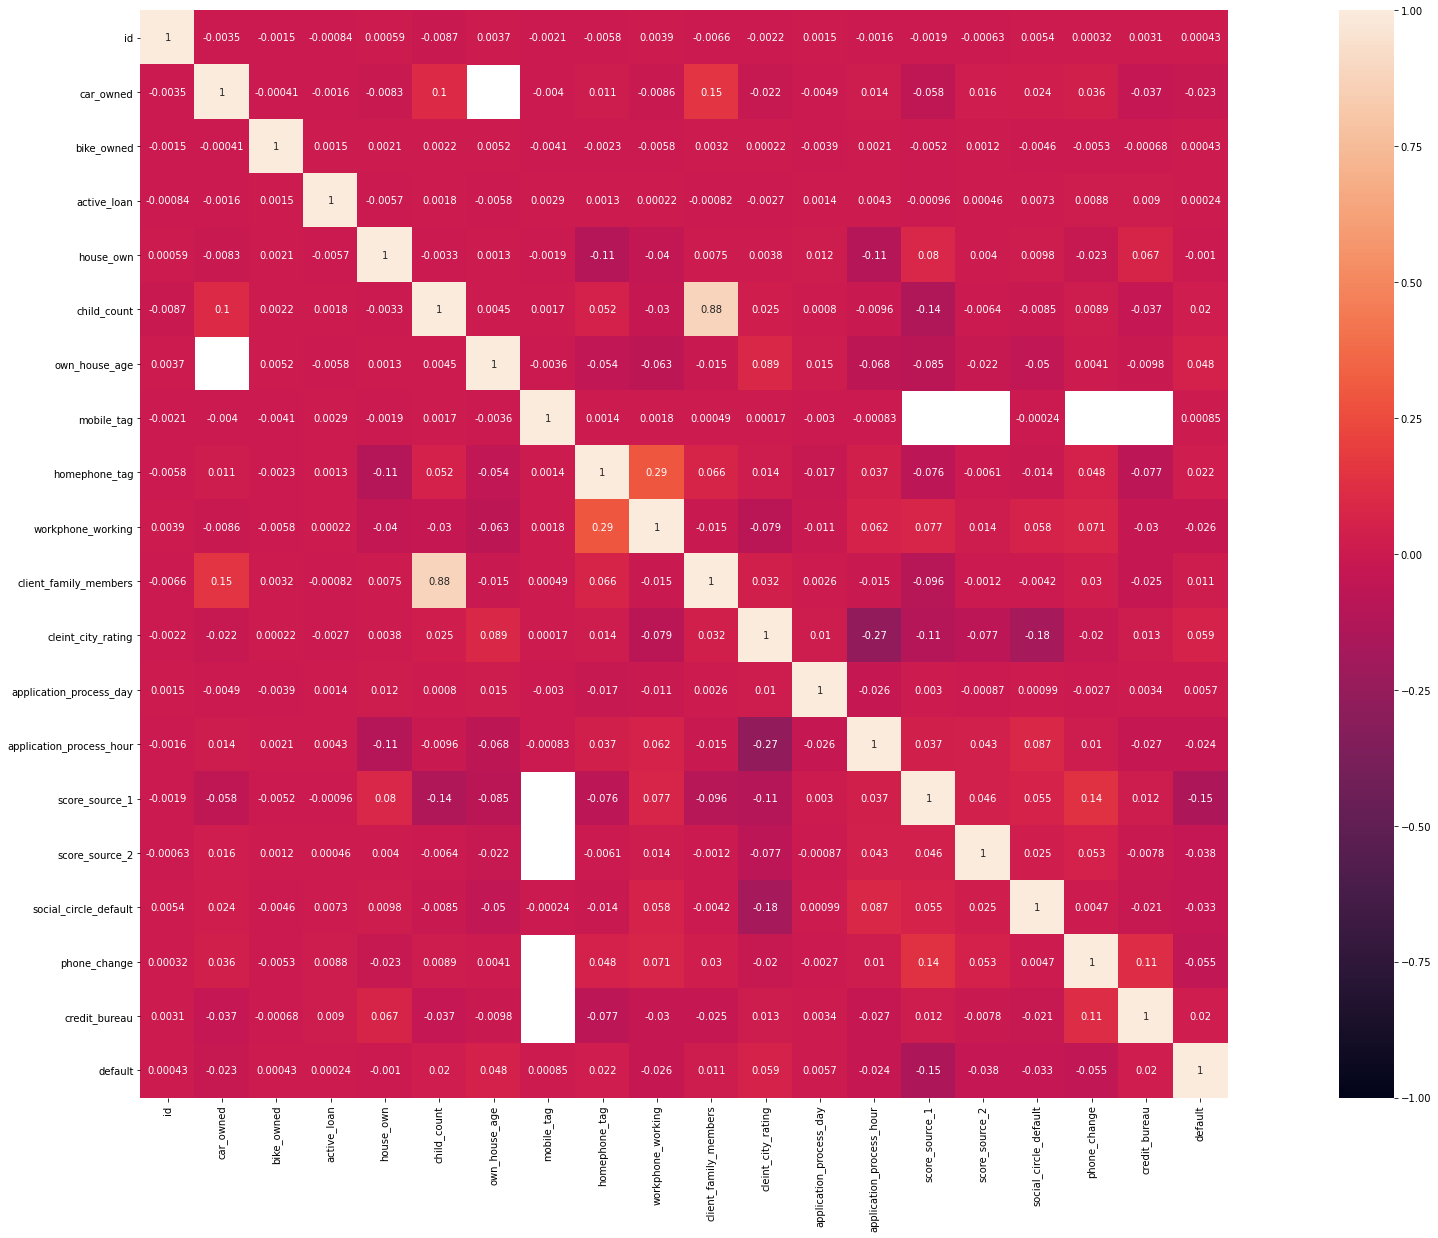

In [19]:
plt.figure(figsize = (40,20))
sns.heatmap(train.corr(), annot = True, vmax = 1, vmin = -1, square = True)

In [20]:
train.drop(['car_owned', 'bike_owned', 'active_loan',
       'house_own', 'child_count','accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type',
       'client_housing_type', 'population_region_relative', 'age_days',
       'employed_days', 'registration_days', 'id_days', 'own_house_age',
       'mobile_tag', 'homephone_tag', 'workphone_working', 'client_occupation',
       'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour',
       'client_permanent_match_tag', 'client_contact_work_tag',
       'type_organization','phone_change'],axis=1, inplace=True)

In [21]:
test.drop(['car_owned', 'bike_owned', 'active_loan',
       'house_own', 'child_count',
       'accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type',
       'client_housing_type', 'population_region_relative', 'age_days',
       'employed_days', 'registration_days', 'id_days', 'own_house_age',
       'mobile_tag', 'homephone_tag', 'workphone_working', 'client_occupation',
       'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour',
       'client_permanent_match_tag', 'client_contact_work_tag',
       'type_organization','phone_change'],axis=1, inplace=True)

In [22]:
train.isnull().sum()

id                           0
client_income             3607
credit_amount             3632
loan_annuity              4812
score_source_1           68835
score_source_2            5686
score_source_3           26921
social_circle_default    61928
credit_bureau            18540
default                      0
dtype: int64

In [23]:
train.columns

Index(['id', 'client_income', 'credit_amount', 'loan_annuity',
       'score_source_1', 'score_source_2', 'score_source_3',
       'social_circle_default', 'credit_bureau', 'default'],
      dtype='object')

In [24]:
train.dtypes

id                         int64
client_income             object
credit_amount             object
loan_annuity              object
score_source_1           float64
score_source_2           float64
score_source_3            object
social_circle_default    float64
credit_bureau            float64
default                    int64
dtype: object

In [25]:
test.isnull().sum()

id                           0
client_income             2434
credit_amount             2287
loan_annuity              3203
score_source_1           45493
score_source_2            3715
score_source_3           18018
social_circle_default    41090
credit_bureau            12282
dtype: int64

In [26]:
from scipy.stats import mode


train.score_source_1 =  train.score_source_1.agg(lambda x : x.fillna(value = 0))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.score_source_1.isna().sum())

Total NaN values present after filling ::  0


In [27]:
train.score_source_2 =  train.score_source_2.agg(lambda x : x.fillna(value = 0))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.score_source_2.isna().sum())

Total NaN values present after filling ::  0


In [28]:
train.score_source_3 =  train.score_source_3.agg(lambda x : x.fillna(value = 0))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.score_source_3.isna().sum())

Total NaN values present after filling ::  0


In [29]:

train.social_circle_default   =  train.social_circle_default  .agg(lambda x : x.fillna(value = 'mean'))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.social_circle_default .isna().sum())

Total NaN values present after filling ::  0


In [30]:
train.credit_bureau  =  train.credit_bureau .agg(lambda x : x.fillna(value = 'mean'))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.credit_bureau .isna().sum())

Total NaN values present after filling ::  0


In [31]:

train.client_income  =  train.client_income.agg(lambda x : x.fillna(value = 'mean'))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.client_income.isna().sum())

Total NaN values present after filling ::  0


In [32]:

train.credit_amount  =  train.credit_amount.agg(lambda x : x.fillna(value = 'mean'))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.credit_amount.isna().sum())

Total NaN values present after filling ::  0


In [33]:

train.loan_annuity  =  train.loan_annuity.agg(lambda x : x.fillna(value = 'mean'))

# Checking for NaN values present

print('Total NaN values present after filling :: ', train.loan_annuity.isna().sum())

Total NaN values present after filling ::  0


In [34]:
train.isnull().sum()

id                       0
client_income            0
credit_amount            0
loan_annuity             0
score_source_1           0
score_source_2           0
score_source_3           0
social_circle_default    0
credit_bureau            0
default                  0
dtype: int64

In [35]:
train_int_cols = list(train.select_dtypes(include = np.number).columns)
train_obj_cols = list(train.select_dtypes(include = np.object).columns) 

In [36]:
train_int_cols

['id', 'score_source_1', 'score_source_2', 'default']

In [37]:
train_obj_cols

['client_income',
 'credit_amount',
 'loan_annuity',
 'score_source_3',
 'social_circle_default',
 'credit_bureau']

In [38]:
# dropping last item
train_int_cols_temp = train_int_cols[ :-1]
train_int_cols_temp

train[train_int_cols_temp]= train[train_int_cols_temp].transform(lambda x : np.log(x + 1))
train[train_int_cols_temp].isna().sum()

id                0
score_source_1    0
score_source_2    0
dtype: int64

In [39]:
dummy = pd.get_dummies(train[train_obj_cols])
dummy.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121816,121817,121818,121819,121820,121821,121822,121823,121824,121825,121826,121827,121828,121829,121830,121831,121832,121833,121834,121835,121836,121837,121838,121839,121840,121841,121842,121843,121844,121845,121846,121847,121848,121849,121850,121851,121852,121853,121854,121855
client_income_2565.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
client_income_2646.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
client_income_2700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
client_income_2835.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
client_income_2925.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
credit_bureau_17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
credit_bureau_19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
credit_bureau_21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
credit_bureau_22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
train_final = pd.concat([train[train_int_cols], dummy], axis = 1)
train_final

,id,score_source_1,score_source_2,default,client_income_2565.0,client_income_2646.0,client_income_2700.0,client_income_2835.0,client_income_2925.0,client_income_3015.0,client_income_3150.0,client_income_3375.0,client_income_3555.0,client_income_3600.0,client_income_3690.0,client_income_3735.0,client_income_3825.0,client_income_3915.0,client_income_4005.0,client_income_4050.0,client_income_4095.0,client_income_4140.0,client_income_4185.0,client_income_4275.0,client_income_4365.0,client_income_4388.4,client_income_4403.7,client_income_4410.0,client_income_4500.0,client_income_4680.0,client_income_4698.0,client_income_4719.6,client_income_4725.0,client_income_4849.2,client_income_4900.5,client_income_4950.0,client_income_5040.0,client_income_5085.0,client_income_5175.0,client_income_5220.0,...,social_circle_default_0.8938,social_circle_default_0.8979,social_circle_default_0.9009999999999999,social_circle_default_0.9052,social_circle_default_0.9072,social_circle_default_0.9206,social_circle_default_0.9247,social_circle_default_0.9402,social_circle_default_0.9443,social_circle_default_0.9485,social_circle_default_0.9557,social_circle_default_0.9562,social_circle_default_0.9804,social_circle_default_0.9814,social_circle_default_0.9876,social_circle_default_0.9907,social_circle_default_1.0,social_circle_default_mean,credit_bureau_0.0,credit_bureau_1.0,credit_bureau_2.0,credit_bureau_3.0,credit_bureau_4.0,credit_bureau_5.0,credit_bureau_6.0,credit_bureau_7.0,credit_bureau_8.0,credit_bureau_9.0,credit_bureau_10.0,credit_bureau_11.0,credit_bureau_12.0,credit_bureau_13.0,credit_bureau_14.0,credit_bureau_15.0,credit_bureau_16.0,credit_bureau_17.0,credit_bureau_19.0,credit_bureau_21.0,credit_bureau_22.0,credit_bureau_mean
0,16.312223,0.449843,0.391222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,16.311929,0.446837,0.194800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16.315410,0.000000,0.440057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.316039,0.000000,0.126793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16.311471,0.410916,0.263273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,16.317579,0.000000,0.160014,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121852,16.314794,0.000000,0.315948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121853,16.309041,0.156191,0.046959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
121854,16.314536,0.167831,0.098521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
train_final.columns

Index(['id', 'score_source_1', 'score_source_2', 'default',
       'client_income_2565.0', 'client_income_2646.0', 'client_income_2700.0',
       'client_income_2835.0', 'client_income_2925.0', 'client_income_3015.0',
       ...
       'credit_bureau_12.0', 'credit_bureau_13.0', 'credit_bureau_14.0',
       'credit_bureau_15.0', 'credit_bureau_16.0', 'credit_bureau_17.0',
       'credit_bureau_19.0', 'credit_bureau_21.0', 'credit_bureau_22.0',
       'credit_bureau_mean'],
      dtype='object', length=28355)

# Making Models ::

In [ ]:
x = train_final.drop('default', axis = 1)
y = train_final.default

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
model_dt = DecisionTreeClassifier(random_state = 10)
model_rf = RandomForestClassifier(random_state = 11)
model_knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1)
#model_lr = LogisticRegression(random_state = 12)
model_nb = GaussianNB()
model_svc = SVC(random_state = 14)

In [ ]:
train_final.credit_default.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

score_values = []
def modelling(models, x_train, y_train, x_test, y_test):
    for model in models:
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        score = accuracy_score(y_test, predict)
        score_values.append(score)
        print(f"Accurace score of {model} is :: ", score)
        print(f"Classification Report is :: \n")
        print(classification_report(y_test, predict))
        print('*' * 90)

        
# using the function

models = [model_dt, model_knn, model_nb, model_rf, model_svc]
modelling(models, x_train, y_train, x_test, y_test)

## Observation ::

- SVC and RandomForest have same accuracy = 77%
- naive Bayes have accuracy = 75%
- Knn have accuracy = 76%
- Decision Tree have accuracy = 69%

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# calculating log probabilities of models used

prob_dt = model_dt.predict_proba(x_test)
prob_rf = model_rf.predict_proba(x_test)
prob_knn = model_knn.predict_proba(x_test)
prob_nb = model_nb.predict_proba(x_test)


In [ ]:
# Keep Probabilities of the positive class only.

prob_dt = prob_dt[:, 1]
prob_rf = prob_rf[:, 1]
prob_knn = prob_knn[:, 1]
prob_nb = prob_nb[:, 1]

In [ ]:
# Calculating the auc score and displaying it

auc_dt = roc_auc_score(y_test, prob_dt)
auc_rf = roc_auc_score(y_test, prob_rf)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_nb = roc_auc_score(y_test, prob_nb)

print('ROC- AUC Score for Decision Tree is :: %0.3f'%auc_dt)
print('ROC- AUC Score for Random Forest is :: %0.3f'%auc_rf)
print('ROC- AUC Score for KNN is :: %0.3f'%auc_knn)
print('ROC- AUC Score for Niave Bayes is :: %0.3f'%auc_nb)

In [ ]:
# Getting the ROC Curve.

fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, prob_dt)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prob_rf)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, prob_knn)
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, prob_nb)

In [ ]:
# Plotting the ROC Curve for all models 

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,7))
plt.plot(fpr_dt, tpr_dt, linewidth = 2, linestyle = 'dotted', label = 'Decision Tree')
plt.plot(fpr_rf, tpr_rf, linewidth = 2, linestyle = 'dashdot', label = 'Random Forest')
plt.plot(fpr_knn, tpr_knn, linewidth = 2, linestyle = 'dashed', label = 'K-Neighbours')
plt.plot(fpr_nb, tpr_nb, linewidth = 2, linestyle = '-', label = 'Naive Bayes')

plt.title('Receiver Operating Characteristic Curve (ROC AUC) Curve', fontsize = 25)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(fontsize = 16)
plt.show()

# Performing actions on Test Data ::

---
# Missing Values Imputation ::

## Filling missing values of 'bankruptcies' column

In [ ]:
from scipy.stats import mode

# Filling with mode value

test.bankruptcies =  test.bankruptcies.agg(lambda x : x.fillna(value = mode(x).mode[0]))

# Checking for NaN values present

print('Total NaN values present after filling :: ', test.bankruptcies.isna().sum())


## Filling missing values of 'months_since_last_delinquent' column

In [ ]:
# Checking values before the filled values 

test['months_since_last_delinquent'].value_counts(dropna = False)

In [ ]:
# Grouping months_since_last_delinquent columns as per  'purpose', 'home_ownership'

mean_score_t = test.groupby(['purpose', 'home_ownership'])['months_since_last_delinquent']
mean_score_t.agg([np.median])

In [ ]:
test.loc[: , 'months_since_last_delinquent'] = mean_score_t.transform(lambda x : x.fillna(x.median()))

#Using ffill to fill any left missing value

test.months_since_last_delinquent = test.months_since_last_delinquent.fillna(method = 'ffill')
# Checking for NaN values present

print('Total NaN values present after filling :: ', test.months_since_last_delinquent.isna().sum())

## Filling 'years_in_current_job'  column ::

In [ ]:
print('Total NaN values present before filling :: ', test.years_in_current_job.isna().sum())

# Displaying total unique values present 

test.years_in_current_job.value_counts(dropna = False)

In [ ]:
### Since NaN values present hence filling it using ffill and bfill 

test.years_in_current_job.fillna(method = 'ffill', inplace = True)
test.years_in_current_job.fillna(method = 'bfill', inplace = True)


# Checking for NaN values present
print('Total NaN values present after filling :: ', test.years_in_current_job.isna().sum())

test.years_in_current_job.value_counts(dropna = False)

## Filling missing values of Annual Income column

- Annual Income and Monthly debt are highly correlated :: 0.58
- Annual Income and Current credti balance also related :: 0.38
- So considering both columns to fill missing values of annual income column

## Filling 'annual_income' column ::

In [ ]:
# Displaying total unique values

test.annual_income.value_counts(dropna = False)

In [ ]:
#tranforming/applying mean values to corresponding rows with missing values

test.annual_income = test.groupby('years_in_current_job')['annual_income'].transform(lambda x : x.fillna(x.mean()))

# Checking for NaN values present

print('Total NaN values present after filling :: ', test.annual_income.isna().sum())

#Displaying values

test.annual_income.value_counts(dropna = False)

## Filling 'credit_score' column ::

In [ ]:
# Displaying total unique values

test.credit_score.value_counts(dropna = False)

In [ ]:
mean_score_t2 = test.groupby('purpose')['credit_score']

mean_score_t2.agg(np.median)             # Since value are close so using this

In [ ]:
test.credit_score = mean_score_t2.transform(lambda x : x.fillna(value = x.median()))

# Since one category has no values in barchart hence using ffill to fill it
#train.credit_score.fillna(method = 'ffill', inplace = True)

# Checking for NaN values present

print('Total NaN values present after filling :: ', test.credit_score.isna().sum())

In [ ]:
#Displaying values

test.credit_score.value_counts(dropna = False)

In [ ]:
# Checking for NaN values

test.agg(lambda x : x.isna().sum())

In [ ]:
test_int_cols = list(test.select_dtypes(include = np.number).columns)
test_obj_cols = list(test.select_dtypes(include = np.object).columns) 

# Data Visualization for Outliers ::

In [ ]:
# Plotting all int/float columns boxplot

plt.figure(figsize = (20,15))
sns.boxplot(data = test[test_int_cols], orient = 'h')

- Maimum Open credit has some outliers hence treating it first

- Since the some values seems to be an outlier hence taking log of all values
- Since some values in column are zero hence adding 1 to every value since log(1) == 0
- Also taking first those columns that have big values in respective columns

### Since target variable is also present in integer columns hence dropping it before transfoming the values. 

In [ ]:
test_int_cols

In [ ]:
test[test_int_cols]= test[test_int_cols].transform(lambda x : np.log(x + 1))
test[test_int_cols].isna().sum()

In [ ]:
# Plotting all int/float columns boxplot

plt.figure(figsize = (20,15))
sns.boxplot(data = test[test_int_cols], orient = 'h')

In [ ]:
test[test_int_cols].describe().T

- Seems that all values have been taken care of. Now proceeding further

In [ ]:
test[test_obj_cols].isna().sum()

In [ ]:
dummy_t = pd.get_dummies(test[test_obj_cols])
dummy_t.T

In [ ]:
test_final = pd.concat([test[test_int_cols], dummy_t], axis = 1)
test_final.T

prediction_dt = model_dt.predict(test_final)
prediction_knn = model_knn.predict(test_final)
prediction_nb = model_nb.predict(test_final)
prediction_rf = model_rf.predict(test_final)
prediction_svc = model_svc.predict(test_final)

submission_result_dt = pd.DataFrame({'Id': test_final.index, 'Credit Default' : prediction_dt})
submission_result_dt.to_csv('submission_result_dt.csv', index=False)

submission_result_knn = pd.DataFrame({'Id': test_final.index, 'Credit Default' : prediction_knn})
submission_result_knn.to_csv('submission_result_knn.csv', index=False)

submission_result_nb = pd.DataFrame({'Id': test_final.index, 'Credit Default' : prediction_nb})
submission_result_knn.to_csv('submission_result_nb.csv', index=False)

submission_result_rf = pd.DataFrame({'Id': test_final.index, 'Credit Default' : prediction_rf})
submission_result_knn.to_csv('submission_result_rf.csv', index=False)

submission_result_svc = pd.DataFrame({'Id': test_final.index, 'Credit Default' : prediction_svc})
submission_result_knn.to_csv('submission_result_svc.csv', index=False)